In [1]:
import glob
import pims
import trackpy as tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u
import bmc

In [2]:
def bead_path(viscosity, solute, size, magnification):
    path = "../data/beads/%s_visc_%s_%s_um-%s*"%(viscosity, solute, size, magnification)
    return glob.glob(path)

In [3]:
# um_per_px for each zoom
x10 = 9.51/13
x20 = 9.51/24
x40 = 9.51/57

# Test #1: 1.66 visc, 0.4 $ \mu m$ size, PVP solution 

In [75]:
path1 = bead_path("1.66", "PVP", "0.4", "40x")[0] + "/*.bmp"
obs1 = experiment(path1, 11, 500, 3, x40)
obs1

Frame 245: 23 trajectories present.


0.4226818304530578

In [78]:
exp1 = bmc.theory_D(0.4, 1.66, 293).value
exp1

0.646415402774001

(200.0, 0.0)

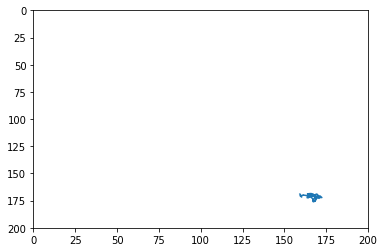

In [6]:
num=3
temp = frame1[frame1["particle"]==num]
plt.figure()
plt.plot(temp["x"], temp['y'])
plt.xlim((0,200))
plt.ylim((200,0))

In [7]:
np.mean(np.diff(temp['x'].values)), np.mean(np.diff(temp['y'].values))

(-0.1643618035410704, -0.059961321321401126)

In [8]:
np.mean(np.diff(temp['x'].values)), np.mean(np.diff(temp['y'].values))

(-0.1643618035410704, -0.059961321321401126)

In [47]:
def experiment(filepath, diameter, minmass, maxsize, um_per_px):
    annotation = bmc.annotate(filepath, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, crop=((0,0), (0,0)))
    tracker = bmc.get_trajectories(annotation, search_range=10, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, clip_stubs=50)
    clear = bmc.clear_drift(tracker, show=False, correct=True)
    diff_coeff = bmc.diffusion_coeff(clear, um_per_px, 30, show=False)
    return diff_coeff

In [48]:
path2 = bead_path("1.66", "PVP", "2.03", "20x")[0]+"/*.bmp"
obs2 = experiment(path2, 5, 50, 3, x20)
obs2

Frame 460: 30 trajectories present.


0.12323353544174802

In [79]:
exp2 = bmc.theory_D(2.03, 1.66, 293).value
exp2

0.12737249315743862

In [50]:
path3 = bead_path("4.65", "GLY", "0.4", "40x")[0]+"/*.bmp"
obs3 = experiment(path3, 11, 500, 11, x40)
obs3

Frame 233: 18 trajectories present.


0.2325033796422822

In [80]:
exp3 = bmc.theory_D(0.4, 4.65, 293).value
exp3

0.23076334808706264

In [61]:
path4 = bead_path("4.65", "PVP", "0.4", "40x")[1]+"/*.bmp"
obs4 = experiment(path4, 11, 500, 11, x40)
obs4

Frame 179: 19 trajectories present.


0.3256151806986959

In [81]:
exp4 = bmc.theory_D(0.4, 4.65, 293).value
exp4

0.23076334808706264

In [55]:
path5 = bead_path("13.2", "PVP", "0.4", "40x")[0]+"/*.bmp"
obs5 = experiment(path5, 11, 300, 11, x40)
obs5

Frame 768: 29 trajectories present.


0.0679429338351699

In [82]:
exp5 = bmc.theory_D(0.4, 13.2, 293).value
exp5

0.08129163398521526

In [94]:
exp_list = np.array([exp1, exp2, exp3, exp4, exp5])
obs_list = np.array([obs1, obs2, obs3, obs4, obs5])

def error(obs, exp):
    return abs(obs - exp) / exp * 100

error(obs1, exp1)

34.611423453219395

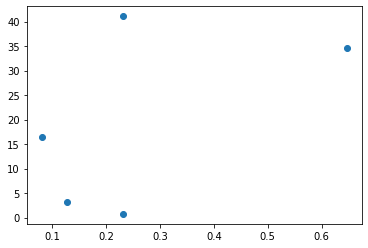

In [100]:
plt.scatter(exp_list, error(obs_list, exp_list))